In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#pd.options.display.max_columns = None
#pd.options.display.max_rows = None

# Load Data

In [2]:
ted_main = pd.read_csv('ted-talks/ted_main.csv')
transcripts = pd.read_csv('ted-talks/transcripts.csv')
ted = pd.merge(ted_main, transcripts, how='outer', on='url')

# Data Cleaning

In [3]:
def remove_numbers(col): 
    pattern = '[0-9]'
    col = [re.sub(pattern, '', i) for i in col] 
    return col

In [4]:
def convert_function(x):
    list_dic = {}
    for row in x:
        list_dic[row['name']] = row['count']
    return list_dic

In [5]:
ted.dropna(inplace=True)
ted.drop(['name'], axis=1, inplace=True)

In [6]:
ted.film_date = pd.to_datetime(ted.film_date,unit='s')
ted.published_date = pd.to_datetime(ted.published_date,unit='s').dt.date

In [7]:
ted.event = remove_numbers(ted.event)
ted = ted.reset_index(drop=False)
ted.drop(['index'], axis=1, inplace=True)

In [8]:
for i in range (0 , ted.shape[0]):
    ted['ratings'][i] = eval(str(ted['ratings'][i] ))

In [9]:
ted['rating_with_counts']= ted['ratings'].map(convert_function)

In [10]:
rating_name = []
for i in range(0,ted.shape[0]):
    for j in range(0,len(ted['ratings'][i])):
        rating_name.append(ted['ratings'][i][j]['name'])

In [11]:
for rate in set(rating_name):
    ted[rate] = ted['rating_with_counts'].map(lambda x:x[rate])

In [12]:
ted = ted[ted['main_speaker'].str.contains('Stewart Brand')]

In [13]:
bagofwords = CountVectorizer(min_df=2, ngram_range = (1,2))
bagofwords.fit(ted['tags'])
df_tags = bagofwords.transform(ted['tags'])

In [14]:
word_counts = np.array(np.sum(df_tags, axis=0)).reshape((-1,))
word_counts

array([2, 2, 5, 5, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 5, 5, 5, 2, 2],
      dtype=int64)

In [15]:
words = np.array(bagofwords.get_feature_names())
words

array(['anthropocene', 'anthropocene ted', 'brain', 'brain trust',
       'change', 'climate', 'climate change', 'energy', 'environment',
       'future', 'future global', 'global', 'global issues', 'green',
       'issues', 'planning', 'technology', 'ted', 'ted brain', 'trust',
       'urban', 'urban planning'], dtype='<U16')

In [16]:
df_tags = pd.DataFrame(columns=bagofwords.get_feature_names(), data=df_tags.toarray())
df_tags= df_tags.add_suffix('_tags')
df_tags.head(1)

,anthropocene_tags,anthropocene ted_tags,brain_tags,brain trust_tags,change_tags,climate_tags,climate change_tags,energy_tags,environment_tags,future_tags,...,global issues_tags,green_tags,issues_tags,planning_tags,technology_tags,ted_tags,ted brain_tags,trust_tags,urban_tags,urban planning_tags
0,0,0,1,1,0,0,0,0,0,1,...,1,0,1,1,1,1,1,1,1,1


#### Feature selection:  <br> Broke down ratings column (list of dictionaries) to get a sum of positive and negative reviews, considered a talk successful if  views >1 million views. Otherwise, we consider as fail.  

In [17]:
ted = ted.reset_index(drop=False)
ted.drop(['index'], axis=1, inplace=True)
ted = ted.join(df_tags)
ted['successful'] = (ted['views'] > 1000000).astype(int)

In [18]:
ted.head(2)

,comments,description,duration,event,film_date,languages,main_speaker,num_speaker,published_date,ratings,...,green_tags,issues_tags,planning_tags,technology_tags,ted_tags,ted brain_tags,trust_tags,urban_tags,urban planning_tags,successful
0,99,"Rural villages worldwide are being deserted, a...",185,TED,2006-02-02,44,Stewart Brand,1,2007-05-17,"[{'id': 2, 'name': 'Confusing', 'count': 159},...",...,0,1,1,1,1,1,1,1,1,0
1,51,Stewart Brand works on the Clock of the Long N...,1403,TED,2004-02-02,17,Stewart Brand,1,2008-11-17,"[{'id': 10, 'name': 'Inspiring', 'count': 84},...",...,0,0,0,1,1,1,1,0,0,0


# EDA

In [19]:
view_data = []
date_data = []
per_talk = []
title_data = [] 
comments_data = [] 
for i in range(0,ted.shape[0]):
    view_data.append(ted['views'][i])
    date_data.append(str(ted['film_date'][i]))
    per_talk.append(i+1)
    title_data.append(ted['title'][i])
    comments_data.append(ted['comments'][i])

In [20]:
view_data
date_data.sort()

In [21]:
for i in range(0,len(date_data)):
    date_data[i] = date_data[i].replace('00:00:00', '')

#### Ted influencer decides to view the general overview of all of his videos that are divided into the following graphs:

- Comments per talk
- Views per talk
- Negative and 
- Positive ratings


#### Now, Ted influencer has a better understanding on how his ted talks are doing and can see where he/she is able to improve so that his viewer is proud of his TedTalk.

#### Number of Views Per Talk

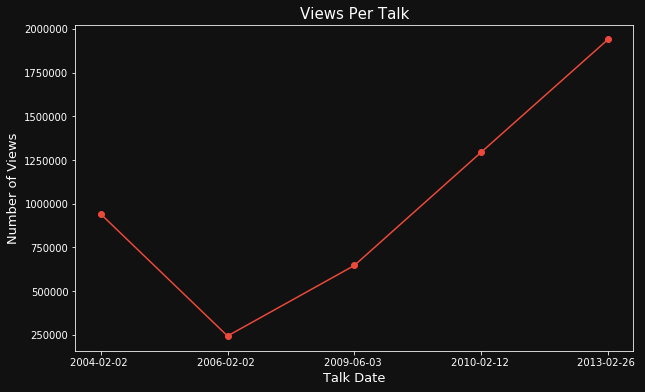

In [22]:
plt.figure(figsize=(10,6))
ax = plt.axes()
ax.set_facecolor("#111111")
ax.figure.set_facecolor('#111111')
ax.tick_params(axis='x', colors='#FFFFFF')
ax.tick_params(axis='y', colors='#FFFFFF')
ax.spines['bottom'].set_edgecolor('#FFFFFF')
ax.spines['top'].set_edgecolor('#FFFFFF')
ax.spines['left'].set_edgecolor('#FFFFFF')
ax.spines['right'].set_edgecolor('#FFFFFF')
plt.plot(date_data,view_data,marker='o',color='#EB493B')
plt.xlabel('Talk Date',color='#FFFFFF',size = 13)
plt.ylabel('Number of Views',color='#FFFFFF',size = 13)
plt.title('Views Per Talk',color='#FFFFFF',size = 15)
plt.show()

#### Numver of Comments Per Talk

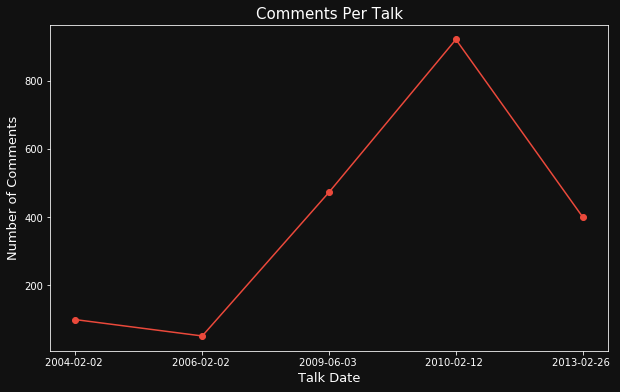

In [23]:
plt.figure(figsize=(10,6))
ax = plt.axes()
ax.set_facecolor("#111111")
ax.figure.set_facecolor('#111111')
ax.tick_params(axis='x', colors='#FFFFFF')
ax.tick_params(axis='y', colors='#FFFFFF')
ax.spines['bottom'].set_edgecolor('#FFFFFF')
ax.spines['top'].set_edgecolor('#FFFFFF')
ax.spines['left'].set_edgecolor('#FFFFFF')
ax.spines['right'].set_edgecolor('#FFFFFF')
plt.plot(date_data,comments_data,marker='o',color='#EB493B')
plt.xlabel('Talk Date',color='#FFFFFF',size =13)
plt.ylabel('Number of Comments',color='#FFFFFF',size =13)
plt.title('Comments Per Talk',color='#FFFFFF',size =15)
plt.show()

In [24]:
ted.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'num_speaker', 'published_date', 'ratings',
       'related_talks', 'speaker_occupation', 'tags', 'title', 'url', 'views',
       'transcript', 'rating_with_counts', 'Jaw-dropping', 'Persuasive',
       'Longwinded', 'Unconvincing', 'Funny', 'Courageous', 'Confusing',
       'Obnoxious', 'Beautiful', 'Informative', 'OK', 'Fascinating',
       'Inspiring', 'Ingenious', 'anthropocene_tags', 'anthropocene ted_tags',
       'brain_tags', 'brain trust_tags', 'change_tags', 'climate_tags',
       'climate change_tags', 'energy_tags', 'environment_tags', 'future_tags',
       'future global_tags', 'global_tags', 'global issues_tags', 'green_tags',
       'issues_tags', 'planning_tags', 'technology_tags', 'ted_tags',
       'ted brain_tags', 'trust_tags', 'urban_tags', 'urban planning_tags',
       'successful'],
      dtype='object')

'Inspiring', 'Longwinded',
       'Courageous', 'Funny', 'Fascinating', 'Confusing', 'Informative',
       'Ingenious', 'OK', 'Unconvincing', 'Obnoxious', 'Beautiful',
       'Jaw-dropping', 'Persuasive'

In [25]:
sum_pos = (ted['Inspiring'] + ted['Courageous']+ted['Funny']+ted['Fascinating']+
           ted['Informative']+ted['Ingenious']+ted['Beautiful']+ted['Persuasive'])
sum_neg = (ted['Unconvincing']+ted['OK']+ted['Longwinded']+ted['Obnoxious']+ted['Confusing'])

In [26]:
Unconvincing = (ted['Unconvincing'].sum()/sum_neg.sum())*100
OK = (ted['OK'].sum()/sum_neg.sum())*100
Longwinded = (ted['Longwinded'].sum()/sum_neg.sum())*100
Obnoxious = (ted['Obnoxious'].sum()/sum_neg.sum())*100
Confusing = (ted['Confusing'].sum()/sum_neg.sum())*100

#### Negative Ratings

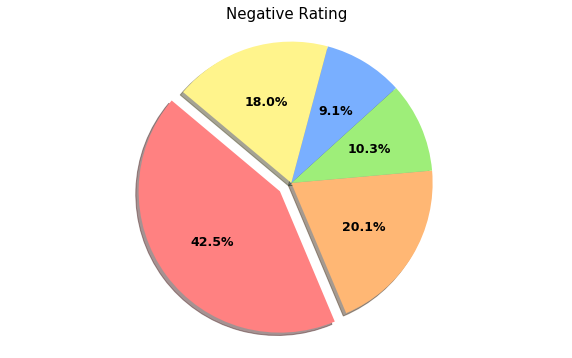

In [27]:
labels = 'Unconvincing', 'OK', 'Longwinded', 'Obnoxious','Confusing'
sizes = [Unconvincing, OK, Longwinded, Obnoxious,Confusing]
colors = ['#FF8181', '#FFB774', '#9EEE79', '#79AFFF','#FFF48C']
explode = (0.1, 0, 0, 0,0) 

plt.figure(figsize=(10,6))
ax = plt.axes()
_, _, autopcts = plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140,
       textprops={'color':"w"})
plt.title('Negative Rating',color='#000000',size = 15)
ax.patch.set_facecolor('black')

plt.setp(autopcts, **{'color':'black', 'weight':'bold', 'fontsize':12.5})

plt.axis('equal')
plt.show()

In [28]:
Inspiring=(ted['Inspiring'].sum()/sum_pos.sum())*100
Courageous=(ted['Courageous'].sum()/sum_pos.sum())*100
Funny=(ted['Funny'].sum()/sum_pos.sum())*100
Fascinating=(ted['Fascinating'].sum()/sum_pos.sum())*100
Informative=(ted['Informative'].sum()/sum_pos.sum())*100
Ingenious=(ted['Ingenious'].sum()/sum_pos.sum())*100
Beautiful=(ted['Beautiful'].sum()/sum_pos.sum())*100
Persuasive=(ted['Persuasive'].sum()/sum_pos.sum())*100

#### Positive Ratings

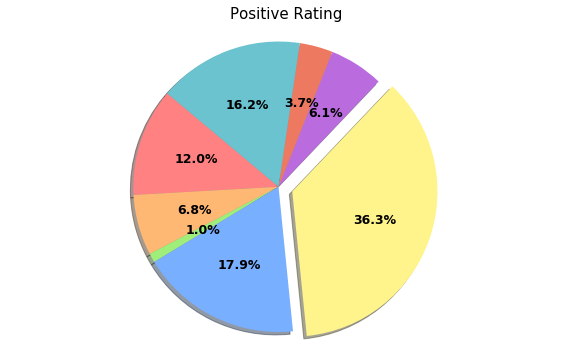

In [29]:
labels = 'Inspiring', 'Courageous', 'Funny', 'Fascinating','Informative','Ingenious','Beautiful','Persuasive'
sizes = [Inspiring,Courageous,Funny, Fascinating,Informative,Ingenious,Beautiful,Persuasive]
colors = ['#FF8181', '#FFB774', '#9EEE79', '#79AFFF','#FFF48C','#BA6CDF','#EC7960','#6AC3CF']
explode = (0, 0, 0, 0,0.1,0,0,0) 

plt.figure(figsize=(10,6))
_, _, autopcts = plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140,textprops={'color':"w"})
plt.setp(autopcts, **{'color':'black', 'weight':'bold', 'fontsize':12.5})
plt.title('Positive Rating',color='#000000',size = 15)
plt.axis('equal')
plt.show()

# Next Steps

#### Data Science:
#### - SEO (Keyword search)
#### - Have demographic data of viewers (Age, gender, occupation)
#### - Visual representation of bounce rate throughout video
